# Results of different f values

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,1.5,200,5.0,5.0,1.0,240.632002,1.062545,41728.136217,48.1909
1,StochasticIterativePlanner,1.6,200,5.0,5.0,1.0,235.233144,1.289910,40336.297928,55.1853
2,StochasticIterativePlanner,1.7,200,5.0,5.0,1.0,228.893235,1.613835,39160.615813,61.8019
3,StochasticIterativePlanner,1.8,200,5.0,5.0,1.0,221.373182,1.439712,37928.426946,69.2535
4,StochasticIterativePlanner,1.9,200,5.0,5.0,1.0,218.028771,1.640445,36847.980932,74.8348


In [ ]:
num_agents = 300

results = results.loc[results['num_agents']==num_agents]

planners_names = ['StochasticIterativePlanner', 'StochasticStaticLackPlanner', 'StochasticAdditive5LackPlanner', 'StochasticMonotone15LackPlanner', 'StochasticMonotone20LackPlanner', 'StochasticMonotone30LackPlanner', 'StochasticMonotone45LackPlanner']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:cyan',  'tab:purple', 'tab:pink']

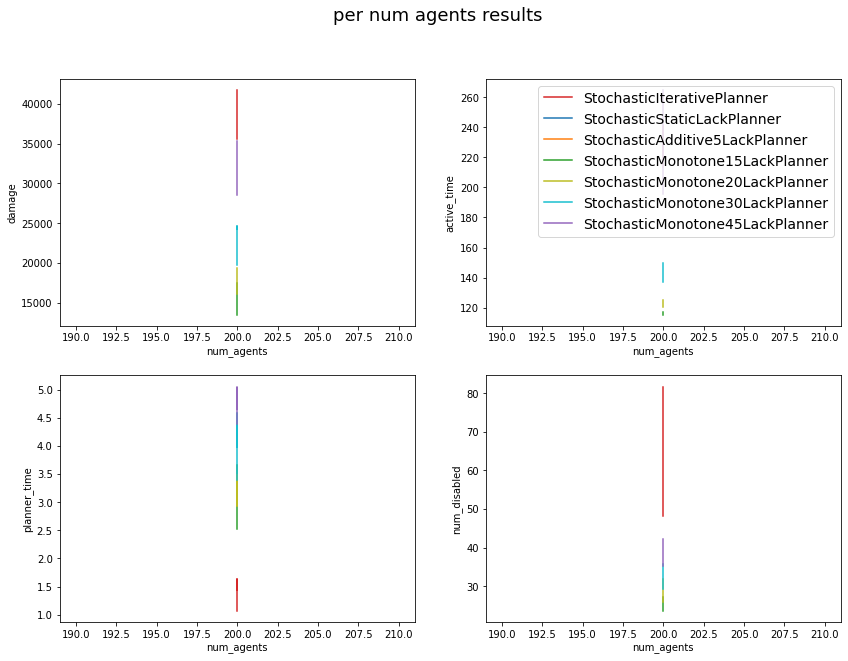

In [26]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

plt.figure(figsize=(14,10))
plt.suptitle('per num agents results', fontsize=18)

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.subplot(2, 2, i+1)
    plt.xlabel(x)
    plt.ylabel(y)
    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]), list(r[y]), c=colors[j])

    if i==1:
        plt.legend(planners_names, fontsize='14')

plt.savefig('./plots/stochastic_num_agents.png')
plt.show()

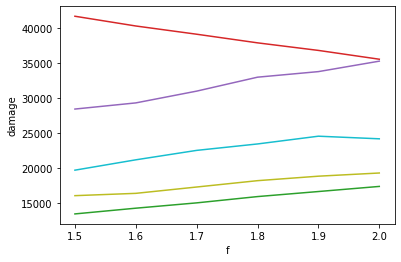

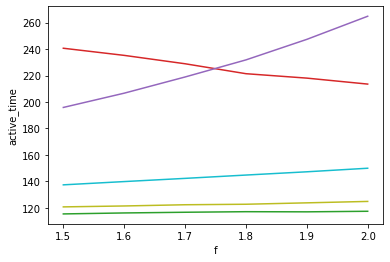

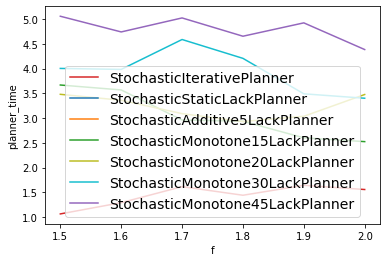

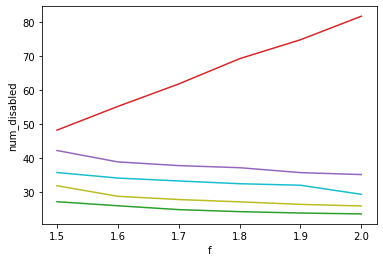

In [27]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['f' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 2:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()